In [1]:
'Author: hernanda472@gmail.com'

import numpy as np
import pandas as pd

In [2]:
# load Dataset
df = pd.read_csv("3 Dataset.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**CLASSIFICATION**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [4]:
x = df.iloc[:, 1:3]
x = pd.get_dummies(x)
x = x.values
x

array([[19,  0,  1],
       [21,  0,  1],
       [20,  1,  0],
       [23,  1,  0],
       [31,  1,  0],
       [22,  1,  0],
       [35,  1,  0],
       [23,  1,  0],
       [64,  0,  1],
       [30,  1,  0],
       [67,  0,  1],
       [35,  1,  0],
       [58,  1,  0],
       [24,  1,  0],
       [37,  0,  1],
       [22,  0,  1],
       [35,  1,  0],
       [20,  0,  1],
       [52,  0,  1],
       [35,  1,  0],
       [35,  0,  1],
       [25,  0,  1],
       [46,  1,  0],
       [31,  0,  1],
       [54,  1,  0],
       [29,  0,  1],
       [45,  1,  0],
       [35,  0,  1],
       [40,  1,  0],
       [23,  1,  0],
       [60,  0,  1],
       [21,  1,  0],
       [53,  0,  1],
       [18,  0,  1],
       [49,  1,  0],
       [21,  1,  0],
       [42,  1,  0],
       [30,  1,  0],
       [36,  1,  0],
       [20,  1,  0],
       [65,  1,  0],
       [24,  0,  1],
       [48,  0,  1],
       [31,  1,  0],
       [49,  1,  0],
       [24,  1,  0],
       [50,  1,  0],
       [27,  

In [5]:
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'kd_tree', leaf_size = 30, p = 2, metric = 'minkowski', n_jobs = -1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [6]:
KNN.predict(x_test)

array([12, 81, 14,  8, 14,  6, 42, 48, 46, 77,  7,  5,  6, 77, 46, 55, 43,
        7, 14,  5, 77,  6, 23, 17,  5, 55, 42, 14, 40, 12, 73, 46, 36, 12,
       17, 36, 42, 18, 45,  5, 14, 18,  6, 46, 17,  6, 77,  6, 42, 46],
      dtype=int64)

In [7]:
y_pred = KNN.predict(x_test)
print(classification_report(y_test.reshape(-1, 1), y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.33      1.00      0.50         1
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          26       0.00    

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [8]:
print('Cross val', cross_val_score(KNN, y_test.reshape(-1, 1), y_pred, cv = 5))
print('Cross val', np.mean(cross_val_score(KNN, y_test.reshape(-1, 1), y_pred)))

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross val [0.  0.  0.1 0.2 0.2]
Cross val 0.1


C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


**CLUSTERING**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


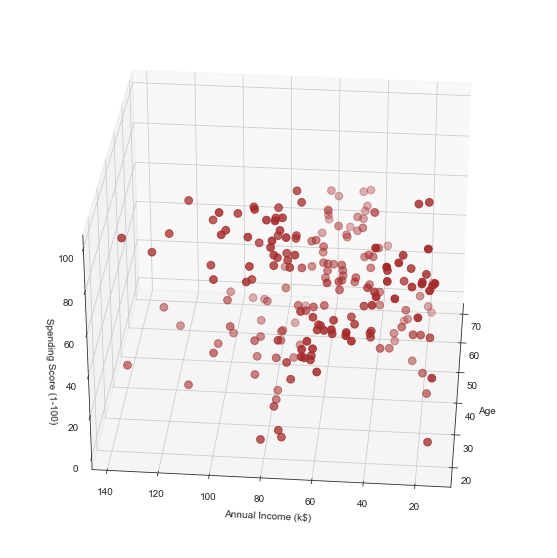

In [13]:
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='brown', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

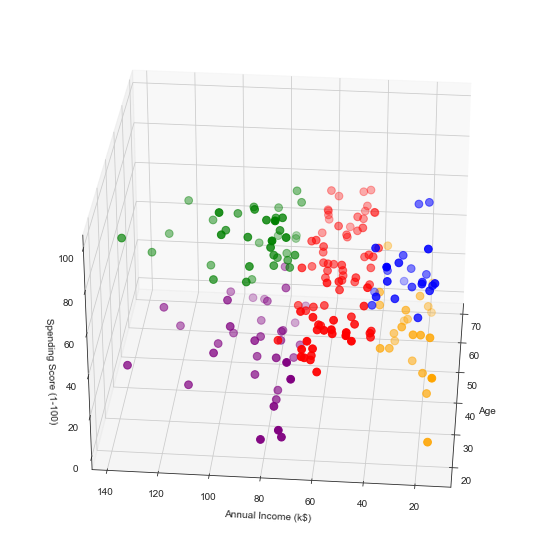

In [14]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])
df["label"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()